<a href="https://colab.research.google.com/github/juan46buitrago/ia_2025/blob/main/arbol_de_regresion_hosing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv('/content/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:

df=pd.DataFrame(data)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

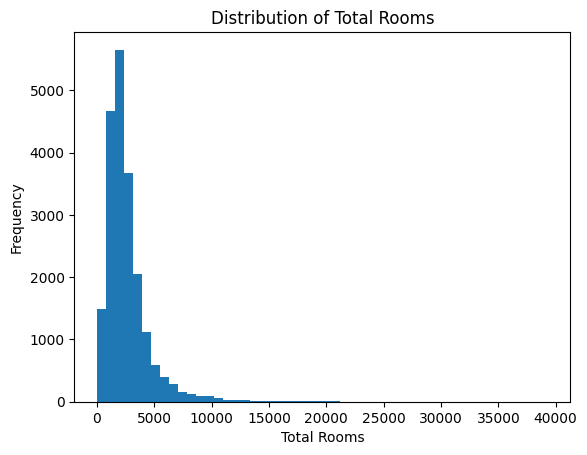

In [9]:
plt.hist(df['total_rooms'], bins=50)
plt.xlabel('Total Rooms')
plt.ylabel('Frequency')
plt.title('Distribution of Total Rooms')
plt.show()

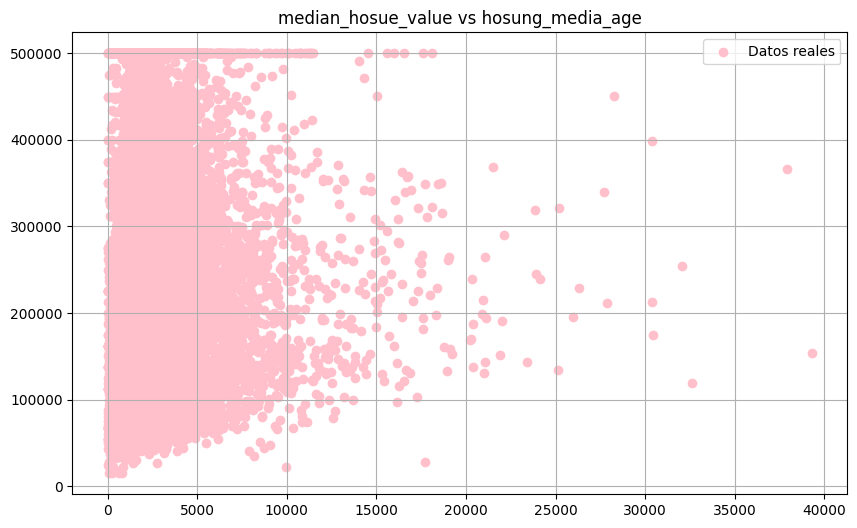

In [10]:
X=df['total_rooms'] #variable independiente
Y= df['median_house_value']
plt.figure(figsize=(10,6))
plt.scatter(X,Y, color ="pink", label="Datos reales")
plt.title("median_hosue_value vs hosung_media_age")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
df_4_habitaciones = df[df['total_bedrooms'] == 4]
display(df_4_habitaciones)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY
12649,-121.47,38.51,52.0,20.0,4.0,74.0,9.0,3.6250,80000.0,INLAND
14822,-117.12,32.66,52.0,16.0,4.0,8.0,3.0,1.1250,60000.0,NEAR OCEAN
17118,-122.14,37.50,46.0,30.0,4.0,13.0,5.0,15.0001,500001.0,NEAR BAY
18210,-122.06,37.39,26.0,18.0,4.0,8.0,4.0,3.7500,375000.0,NEAR BAY
18506,-122.00,37.00,16.0,32.0,4.0,36.0,5.0,2.6250,137500.0,NEAR OCEAN
19389,-120.85,37.75,26.0,28.0,4.0,9.0,5.0,1.6250,85000.0,INLAND


In [12]:
X_edad_3a5_dormitorios = df_3_a_5_dormitorios['housing_median_age']
Y_precio_3a5_dormitorios = df_3_a_5_dormitorios['median_house_value']
plt.figure(figsize=(10,6))
plt.scatter(X_edad_3a5_dormitorios, Y_precio_3a5_dormitorios, color ="pink", label="Datos reales")
plt.title("Median House Value vs Housing Median Age for 3-5 Bedroom Houses")
plt.xlabel("Housing Median Age")
plt.ylabel("Median House Value")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'df_3_a_5_dormitorios' is not defined

In [ ]:
X_edad_3a5_dormitorios = df_3_a_5_dormitorios['latitude']
Y_precio_3a5_dormitorios = df_3_a_5_dormitorios['median_house_value']
plt.figure(figsize=(10,6))
plt.scatter(X_edad_3a5_dormitorios, Y_precio_3a5_dormitorios, color ="pink", label="Datos reales")
plt.title("Median House Value vs median_income for 4 Bedroom Houses")
plt.xlabel("median_income")
plt.ylabel("Median House Value")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_edad_3a5_dormitorios = df_3_a_5_dormitorios['households']
Y_precio_3a5_dormitorios = df_3_a_5_dormitorios['median_house_value']
plt.figure(figsize=(10,6))
plt.scatter(X_edad_3a5_dormitorios, Y_precio_3a5_dormitorios, color ="pink", label="Datos reales")
plt.title("Median House Value vs median_income for 4 Bedroom Houses")
plt.xlabel("median_income")
plt.ylabel("Median House Value")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Check if the data is not empty before fitting the model
if not X_edad_3a5_dormitorios.empty and not Y_precio_3a5_dormitorios.empty:
    model3=LinearRegression()
    model3.fit(X_edad_3a5_dormitorios.values.reshape(-1, 1), Y_precio_3a5_dormitorios)

    #generar prediccion
    y_pred3=model3.predict(X_edad_3a5_dormitorios.values.reshape(-1, 1))

    #hallar el R2
    r3_seguro=r2_score(Y_precio_3a5_dormitorios,y_pred3)
    print("Model fitted successfully.")
else:
    print("Cannot fit the model: Input data is empty.")

In [ ]:
# Ensure X_edad_3a5_dormitorios and Y_precio_3a5_dormitorios are defined
X_edad_3a5_dormitorios = df_3_a_5_dormitorios['total_rooms'] #variable independiente
Y_precio_3a5_dormitorios = df_3_a_5_dormitorios['median_house_value']

# Re-fit the model to ensure it's available in this cell's scope
model3 = LinearRegression()
model3.fit(X_edad_3a5_dormitorios.values.reshape(-1, 1), Y_precio_3a5_dormitorios)

# Generate prediction
y_pred3 = model3.predict(X_edad_3a5_dormitorios.values.reshape(-1, 1))

# Calculate R2 score
r2_seguro = r2_score(Y_precio_3a5_dormitorios, y_pred3)

plt.figure(figsize=(10,6))
plt.scatter(X_edad_3a5_dormitorios, Y_precio_3a5_dormitorios, color ="pink", label="Datos reales")
plt.plot(X_edad_3a5_dormitorios, y_pred3, color='blue', linewidth=2, label='Línea de regresión') # Add the regression line
plt.title("Median House Value vs Total Rooms for 3-5 Bedroom Houses") # Corrected title
plt.xlabel("Total Rooms") # Corrected xlabel
plt.ylabel("Median House Value")
plt.legend()
plt.grid(True)
plt.show()

print(f"Ecuacion de la recta: y = {model3.coef_[0]:.2f}x + {model3.intercept_:.2f}")
print(f"Coeficiente de determinación (R^2): {r2_seguro:.2f}")

la media income depende del precio entre mas media income mas puede vale la casa


la tootal rooms depende del precio entre mas media income mas puede vale la casa

la la cercania del mar  depende del precio entre mas media income mas puede vale la casa

algunas features de tabla parad ecidir una mjoer cassa pro ejempl y digo yo la mas impotnate est el media income y lo demas seria dependiendo si te gusta mas el mar o no entre mucho las cualidades que encesitas o mas tegusten


In [14]:
#tratamiento de datos
import pandas as pd
import numpy as np

#visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
#modelo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, roc_auc_score, classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [43]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [44]:

x_entrena_encoded = pd.get_dummies(x_entrena, columns=['ocean_proximity'], drop_first=True)
X_valida_encoded = pd.get_dummies(X_valida, columns=['ocean_proximity'], drop_first=True)

display(x_entrena_encoded.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20582,-122.16,38.90,33.0,1221.0,236.0,488.0,199.0,3.7574,True,False,False,False
13226,-117.68,34.01,20.0,7326.0,1555.0,5718.0,1538.0,3.2073,True,False,False,False
17563,-121.89,37.31,52.0,1994.0,404.0,1014.0,389.0,4.3882,False,False,False,False
15173,-117.06,33.03,23.0,2023.0,309.0,678.0,340.0,7.0913,False,False,False,False
7658,-118.21,33.84,28.0,822.0,205.0,627.0,192.0,3.4583,False,False,False,False


In [45]:
df=df[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value","ocean_proximity"]]
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [28]:
x_entrena,X_valida,Y_entrena,y_valida=train_test_split(df.drop(columns="median_house_value"),df["median_house_value"],train_size=.7,random_state=1279)

In [29]:
x_entrena.shape

(14447, 9)

In [59]:
modelos_ar=DecisionTreeRegressor(max_depth=5,random_state=2022)

In [60]:
modelos_ar.fit(x_entrena_encoded,Y_entrena)

DecisionTreeRegressor(max_depth=5, random_state=2022)

In [61]:
print(f"profundidad del arbol: {modelos_ar.get_depth()}")
print(f"numero de nodos terminales: {modelos_ar.get_n_leaves()}")

profundidad del arbol: 5
numero de nodos terminales: 32


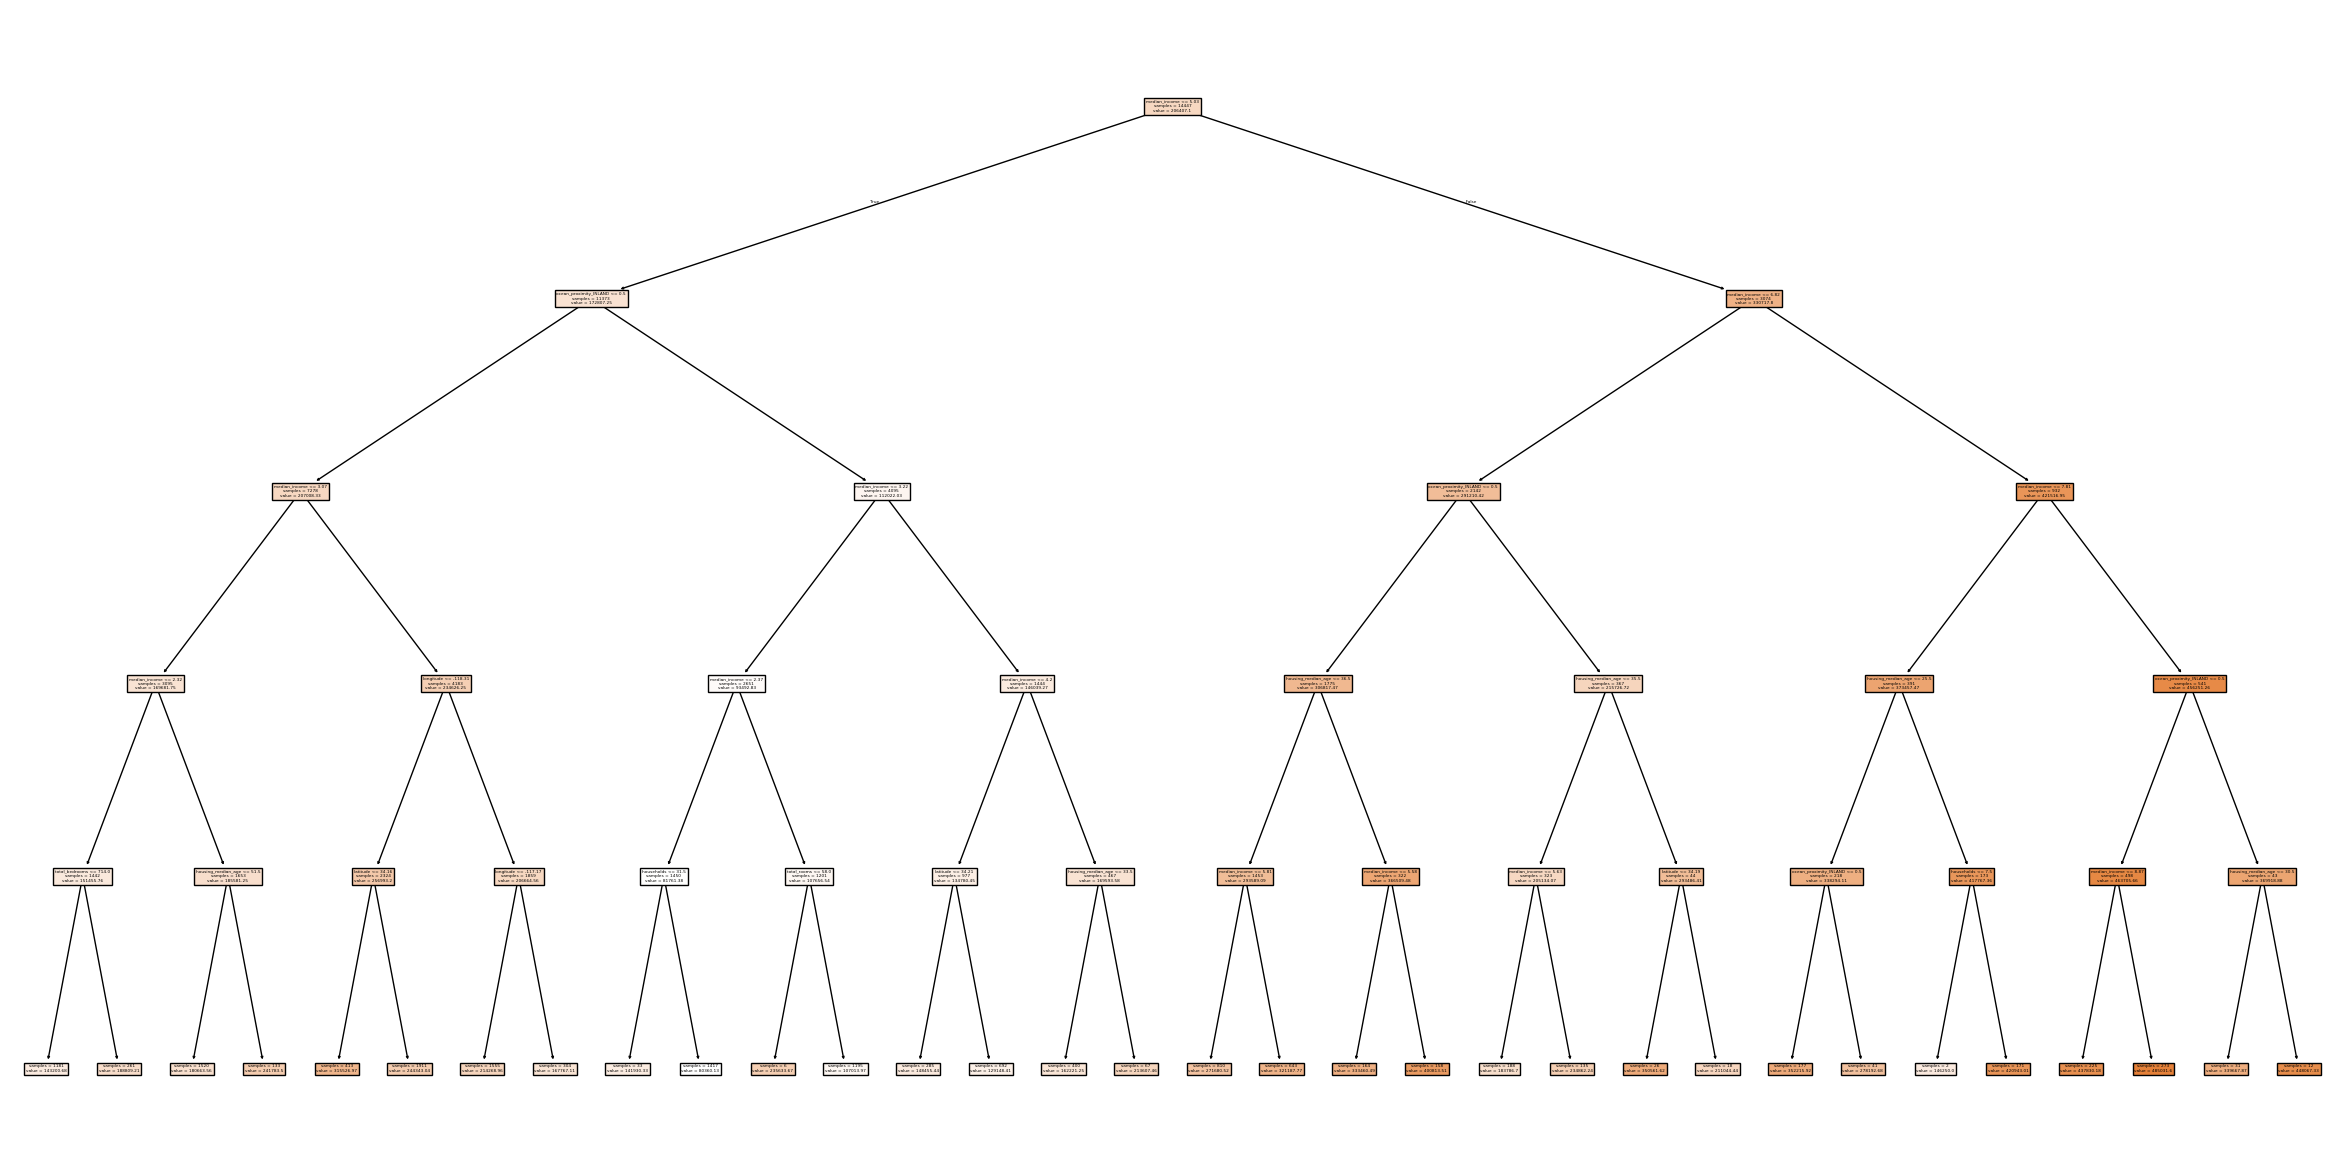

In [67]:
fig,ax=plt.subplots(figsize=(30,15))
plot=plot_tree(
    decision_tree=modelos_ar,
    feature_names=x_entrena_encoded.columns,

    filled=True,
    impurity=False,

    precision=2,
 ax=ax
    )

In [69]:
texto_modelo=export_text(
    decision_tree=modelos_ar,
    feature_names=x_entrena_encoded.columns
)
print(texto_modelo)

|--- median_income <= 5.03
|   |--- ocean_proximity_INLAND <= 0.50
|   |   |--- median_income <= 3.07
|   |   |   |--- median_income <= 2.32
|   |   |   |   |--- total_bedrooms <= 714.00
|   |   |   |   |   |--- value: [143200.68]
|   |   |   |   |--- total_bedrooms >  714.00
|   |   |   |   |   |--- value: [188809.21]
|   |   |   |--- median_income >  2.32
|   |   |   |   |--- housing_median_age <= 51.50
|   |   |   |   |   |--- value: [180663.56]
|   |   |   |   |--- housing_median_age >  51.50
|   |   |   |   |   |--- value: [241783.50]
|   |   |--- median_income >  3.07
|   |   |   |--- longitude <= -118.31
|   |   |   |   |--- latitude <= 34.16
|   |   |   |   |   |--- value: [315526.97]
|   |   |   |   |--- latitude >  34.16
|   |   |   |   |   |--- value: [244343.04]
|   |   |   |--- longitude >  -118.31
|   |   |   |   |--- longitude <= -117.17
|   |   |   |   |   |--- value: [214268.96]
|   |   |   |   |--- longitude >  -117.17
|   |   |   |   |   |--- value: [167767.11]
|   |